In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv('data.csv')

In [9]:
df.head()
print()
print(df.info())
print()
print(df.describe())
print()
print(df.isnull().sum())

In [10]:
df['booking_date'] = pd.to_datetime(df['booking_date'])

df['profit'] = df['selling_price'] - df['costprice']

df['profit_margin'] = (df['profit'] / df['costprice']) * 100

df['booking_month'] = pd.to_datetime(df['booking_date']).dt.month

customer_revenue = df.groupby('buyer_id')['selling_price'].sum()
df['customer_type'] = pd.qcut(customer_revenue, q=3, labels=['Low', 'Medium', 'High'])

#Exploratory Data analysis

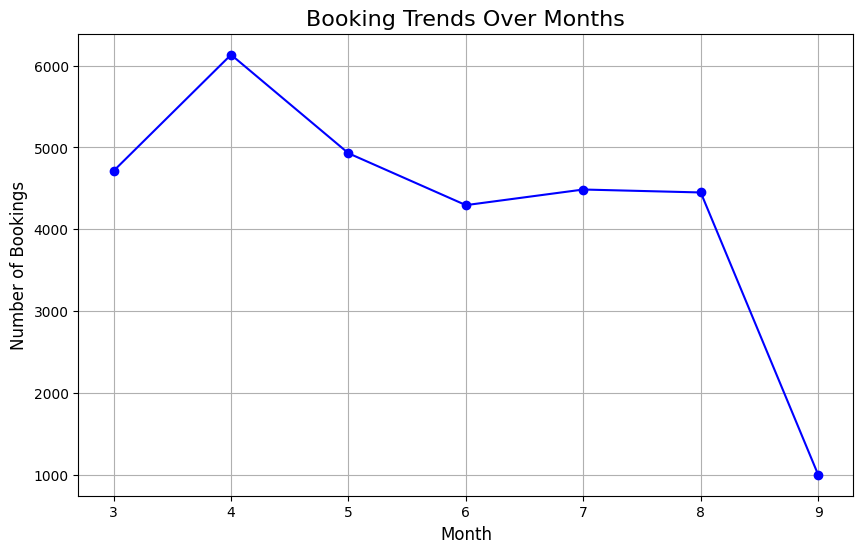

In [11]:
booking_trends = df['booking_date'].dt.month.value_counts().sort_index()

plt.figure(figsize=(10, 6))
booking_trends.plot(kind='line', marker='o', color='blue')
plt.title('Booking Trends Over Months', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.grid()
plt.show()

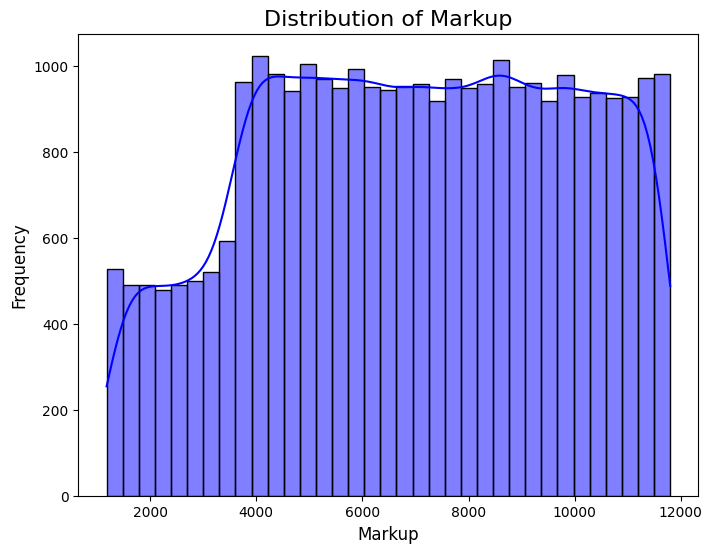

In [12]:
plt.figure(figsize=(8, 6))
sns.histplot(df['markup'], kde=True, color='blue')
plt.title('Distribution of Markup', fontsize=16)
plt.xlabel('Markup', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

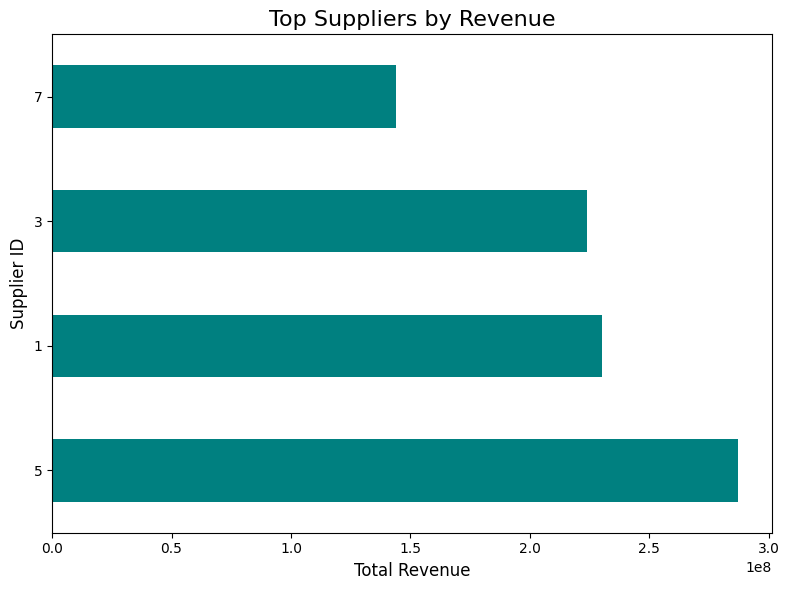

In [13]:
supplier_revenue = df.groupby('supplier_id')['selling_price'].sum().sort_values(ascending=False).head(10)
supplier_revenue.plot(kind='barh', color='teal', figsize=(8, 6))
plt.title('Top Suppliers by Revenue', fontsize=16)
plt.xlabel('Total Revenue', fontsize=12)
plt.ylabel('Supplier ID', fontsize=12)
plt.tight_layout()
plt.show()

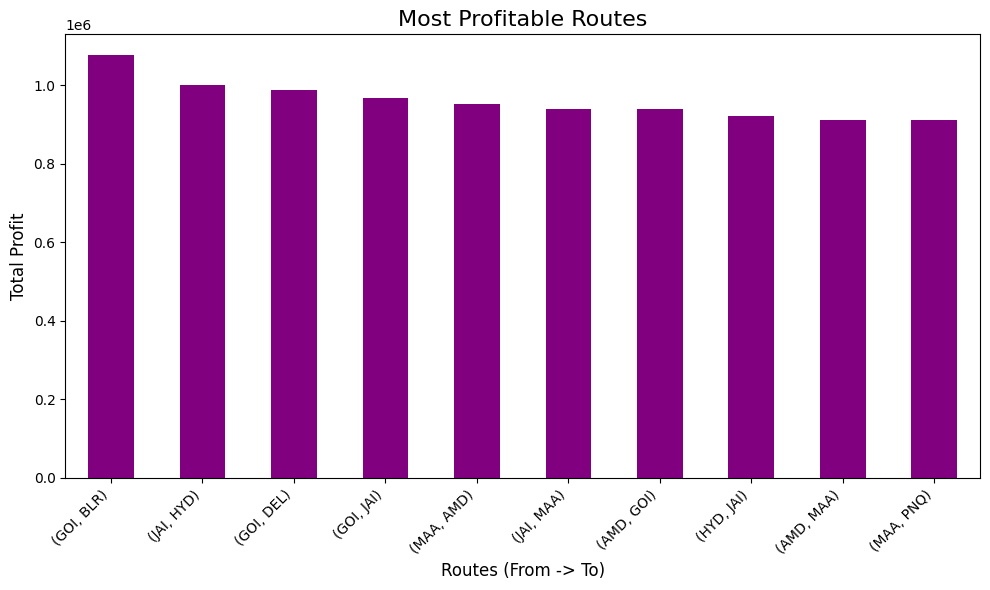

In [14]:
route_profit = df.groupby(['from_airport', 'to_airport'])['profit'].sum().sort_values(ascending=False).head(10)
route_profit.plot(kind='bar', color='purple', figsize=(10, 6))
plt.title('Most Profitable Routes', fontsize=16)
plt.xlabel('Routes (From -> To)', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

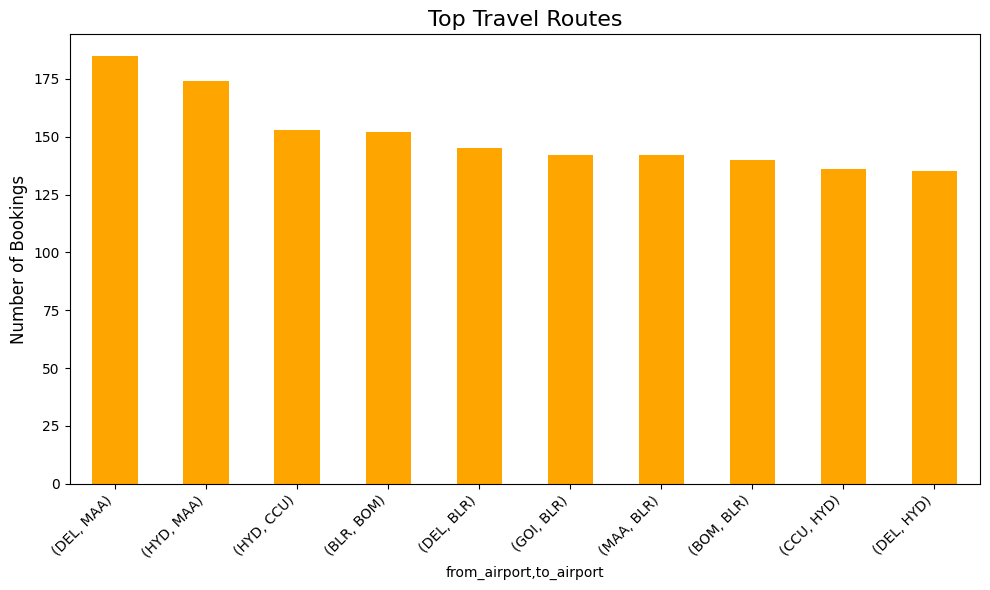

In [15]:
top_routes = df.groupby(['from_airport', 'to_airport']).size().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
top_routes.plot(kind='bar', color='orange')
plt.title('Top Travel Routes', fontsize=16)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-18-deaf00eef952>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='channel_of_booking', data=data, palette='muted')


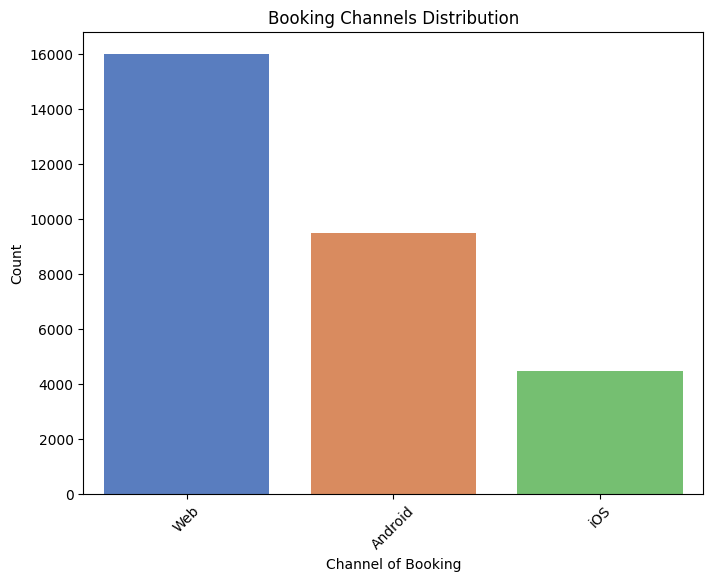

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='channel_of_booking', data=data, palette='muted')
plt.title('Booking Channels Distribution')
plt.xlabel('Channel of Booking')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


#Analysis using models (PCA and KNN)

<ipython-input-19-ba23df09030c>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5, cmap='viridis')


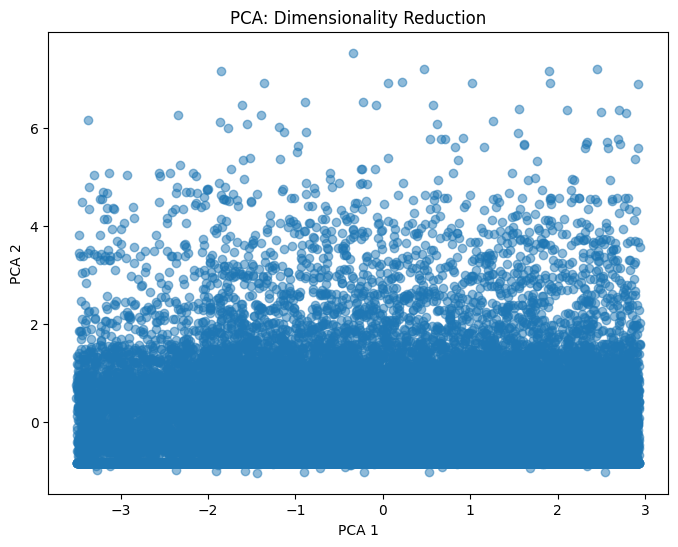

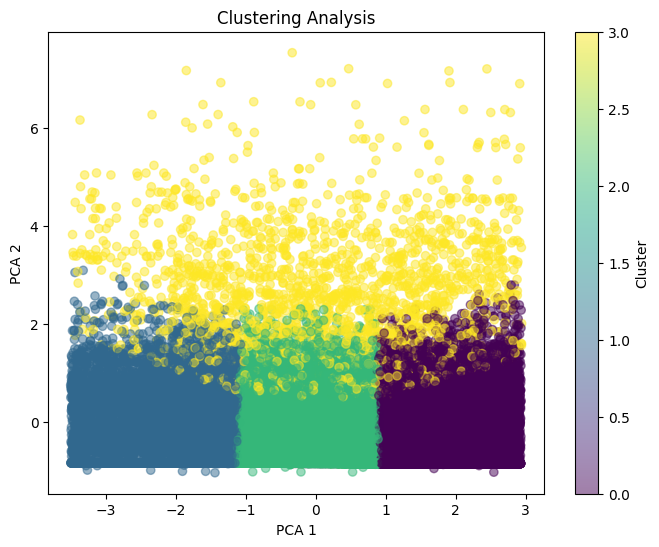

In [19]:
def advanced_eda(data):
    features = ['costprice', 'markup', 'selling_price', 'cashback', 'coupon_redeem']
    data_scaled = StandardScaler().fit_transform(data[features])

    # PCA for dimensionality reduction
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data_scaled)
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], alpha=0.5, cmap='viridis')
    plt.title('PCA: Dimensionality Reduction')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

    # KMeans Clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    clusters = kmeans.fit_predict(data_scaled)
    plt.figure(figsize=(8, 6))
    plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis', alpha=0.5)
    plt.title('Clustering Analysis')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.colorbar(label='Cluster')
    plt.show()
advanced_eda(df)

#Insights

In [22]:
print("Insights:")
print("1. Top suppliers drive majority of the sales; focusing on them could boost revenue.")
print("2. High refund rates on specific channels might indicate usability issues.")
print("3. Cashback and coupon strategies significantly impact customer engagement.")
print()
print("Suggestions:")
print("1. Optimize high-performing routes.")
print("2. Address refund trends by analyzing customer feedback.")
print("3. Enhance Web and Android booking platforms for better conversion rates.")

Insights:
1. Top suppliers drive majority of the sales; focusing on them could boost revenue.
2. High refund rates on specific channels might indicate usability issues.
3. Cashback and coupon strategies significantly impact customer engagement.

Suggestions:
1. Optimize high-performing routes.
2. Address refund trends by analyzing customer feedback.
3. Enhance Web and Android booking platforms for better conversion rates.
